# Modos normales de un sistema de tres masas y cuatro resortes iguales con condiciones de borde tipo D

In [1]:
import numpy as np
import math as math
from scipy import linalg
#https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html
import matplotlib.pyplot as plt

## Ecuación diferencial
Se escribe la ecuación diferencial del sistema

$$\left(\begin{array}{c}\ddot{\xi}_1 \\ \ddot{\xi}_2 \\ \ddot{\xi}_3 \\ \end{array}\right) = 
\omega^2\left(\begin{array}{ccc}-2 & 1 & 0 \\ 1 & -2 & 1 \\ 0 & 1 & -2 \\\end{array}\right)\left(\begin{array}{c}{\xi}_1 \\ {\xi}_2 \\ {\xi}_3 \\ \end{array}\right)$$

donde 
* ${\xi}_i$ son los desplazamientos de la i-ésima partícula fuera de su zona de equilibrio. 
* $\omega^2=k/m$ es el cociente de la constante de los resortes y las masas de las partículas.

Definimos el vector $\pmb{\xi}$ y la matriz $K$ en forma adecuada

$$\ddot{\pmb{\xi}} = -\omega^2 K \pmb{\xi}$$

In [2]:
K = np.matrix([[2,-1,0],[-1,2,-1],[0,-1,2]])
K

matrix([[ 2, -1,  0],
        [-1,  2, -1],
        [ 0, -1,  2]])

## Buscamos los autovalores y autovectores de la matriz K

In [3]:
k,v = linalg.eig(K) 

### Autovalores

* Son reales (como se esperaba)
* De mayor a menor: 
    * $2+\sqrt{2}$
    * $2$
    * $2-\sqrt{2}$

In [4]:
k

array([3.41421356+0.j, 2.        +0.j, 0.58578644+0.j])

### Autovectores
* Son las columnas de la matriz $v$
* Son ortogonales (como se esperaba)
* La operación $v^t K v$ diagonaliza la matriz $K$
    * $\pmb{\tilde{\xi}} = v^t \pmb{\xi}$ son las coordenadas normales, donde el sistema está desacoplado
    * $\pmb{\xi} = v \pmb{\tilde{\xi}}$ invierte las coordenadas normales en las espaciales
    
$\tilde{\xi}_i$ es la amplitud del $i$-ésimo modo normal, cuya frecuencia correspondiente es $\omega \sqrt{k}_i$

Por ejemplo, si se desea ver el primer modo (menor frecuencia), se fija amplitud cero para las coordenadas $i=1,2$ y se deja $\tilde{{\xi}_3}=1$. La solución ($\tilde{\xi}(0)=0$) será:

$$\pmb{\tilde{\xi}}(t)=\sin(\omega \sqrt{k}_2 t)\left(\begin{array}{c}0 \\ 0 \\ 1 \\ \end{array}\right)$$ 

La solución en coordenadas espaciales se obtiene transformando con la matriz $v$. En el caso del modo de frecuencia más baja, la solución es proporcional a la tercera columna de la matriz $v$

$${\xi}_i(t)=\sin(\omega \sqrt{k}_2 t)v_{3i}$$ 

### Columna 3

In [5]:
v

array([[-5.00000000e-01, -7.07106781e-01,  5.00000000e-01],
       [ 7.07106781e-01,  4.05925293e-16,  7.07106781e-01],
       [-5.00000000e-01,  7.07106781e-01,  5.00000000e-01]])

In [6]:
np.transpose(v)[2]

array([0.5       , 0.70710678, 0.5       ])

### Observamos
* Todas las masas están en fase
* La masa del centro tiene una amplitud mayor a las de los extremos

## Primer modo

In [8]:
A=np.transpose(v)[2]
f=math.sqrt(k[2].real)
# https://stackoverflow.com/questions/24592803/separate-real-and-imaginary-part-of-a-complex-number-in-python/24592829

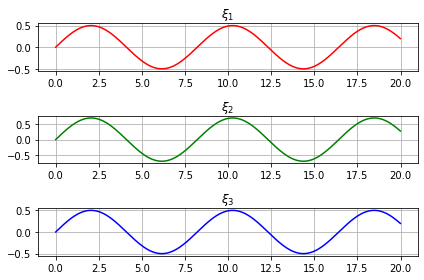

In [9]:
# https://matplotlib.org/stable/gallery/scales/log_demo.html
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
# https://stackoverflow.com/questions/13338550/typing-greek-letters-etc-in-python-plots
# Data for plotting
x = np.arange(0, 20, 0.01)

# Create figure
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

# log y axis
ax1.plot(x, A[0]*np.sin(f*x),'r')
ax1.set(title=r'$\xi_1$')
ax1.grid()

# log x axis
ax2.plot(x, A[1]*np.sin(f*x),'g')
ax2.set(title=r'$\xi_2$')
ax2.grid()

# log x and y axis
ax3.plot(x, A[2]*np.sin(f*x),'b')
ax3.set(title=r'$\xi_3$')
ax3.grid()

fig.tight_layout()
plt.show()

## Segundo modo

In [10]:
A2=np.transpose(v)[1]
f2=math.sqrt(k[1].real)

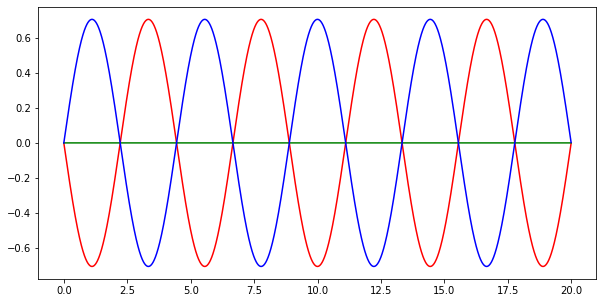

In [11]:
# https://pythonforundergradengineers.com/plotting-sin-cos-with-matplotlib.html
# https://stackoverflow.com/questions/22276066/how-to-plot-multiple-functions-on-the-same-figure-in-matplotlib
# Creating vectors X and Y
x = np.arange(0, 20, 0.01)
y0 = A2[0]*np.sin(f2*x)
y1 = A2[1]*np.sin(f2*x)
y2 = A2[2]*np.sin(f2*x)
  
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, y0,'r')
plt.plot(x, y1,'g')
plt.plot(x, y2,'b')
  
# Show the plot
plt.show()

## Tercer modo

In [12]:
A3=np.transpose(v)[0]
f3=math.sqrt(k[0].real)

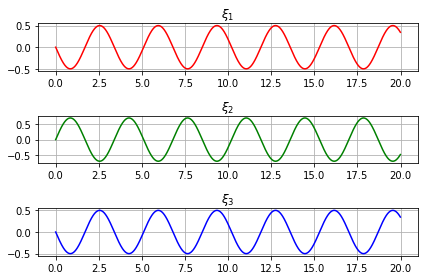

In [13]:
# Data for plotting
x = np.arange(0, 20, 0.01)

# Create figure
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

# log y axis
ax1.plot(x, A3[0]*np.sin(f3*x),'r')
ax1.set(title=r'$\xi_1$')
ax1.grid()

# log x axis
ax2.plot(x, A3[1]*np.sin(f3*x),'g')
ax2.set(title=r'$\xi_2$')
ax2.grid()

# log x and y axis
ax3.plot(x, A3[2]*np.sin(f3*x),'b')
ax3.set(title=r'$\xi_3$')
ax3.grid()

fig.tight_layout()
plt.show()